# Having fun with Mueller calculus!

### In this tutorial you will use Mueller formalism to analyze NIRIS polarization signals


----------
BBSO Summer School - Day 4 \
Author: Taylor Baildon \
Email: tab57@njit.edu \
Date: Aug. 1, 2024

Make sure you have 'mueller.py' in the same directory as this notebook. This file defines the following Mueller matrices:

### Ideal mirror: $ \,\,\,\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1
\end{bmatrix}\,\,\, $ (normal incidence)

### Linear polarizer: $ \,\,\,\dfrac{1}{2}\begin{bmatrix}
1 & \cos{2\theta} & \sin{2\theta} & 0 \\
\cos{2\theta} & \cos^2{2\theta} & \cos{2\theta}\sin{2\theta} & 0 \\
\sin{2\theta} & \cos{2\theta}\sin{2\theta} & \sin^2{2\theta} & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}\,\,\, $ transmission axis orientation $ \theta $

### Rotator: $ \,\,\,\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos{2\alpha} & \sin{2\alpha} & 0 \\
0 & -\sin{2\alpha} & \cos{2\alpha} & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}\,\,\, $ rotation angle $ \alpha $

### Retarder: $ \,\,\,\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos^2{2\theta} + \sin^2{2\theta}\cos{\delta} & \cos{2\theta}\sin{2\theta}(1-\cos{\delta}) & \sin{2\theta}\sin{\delta} \\
0 & \cos{2\theta}\sin{2\theta}(1-\cos{\delta}) & \sin^2{2\theta} + \cos^2{2\theta}\cos{\delta} & -\cos{2\theta}\sin{\delta} \\
0 & -\sin{2\theta}\sin{\delta} & \cos{2\theta}\sin{\delta} & \cos{\delta}
\end{bmatrix}\,\,\, $ 
### <div style="text-align: right"> retardation $ \delta $, fast axis orientation $ \theta $ </div>

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
import mueller
# the following will change the configuration of your Jupyter notebook:
matplotlib.rcParams['font.size'] = 18            ## legible font size for matplotlib plots
#%config InlineBackend.figure_format = 'retina'   ## clearer figures for retina display (Mac)

## Start with a Stokes vector for a partially polarized beam
Let's see how different optical elements alter the beam

In [5]:
S_in = np.array([1,0.2,0.3,0.4])   # arbitrary polarization

# model the beam after it is reflected by an ideal mirror (normal incidence)

M_mirror = mueller.ideal_mirror()

# note: we are expressing the Stokes parameters as a row vector, 
# so we will use the transpose of our Mueller matrices in the following calculations
S_out = np.transpose(M_mirror) @ S_in

print('we see the U and V polarization components are flipped after reflection at normal incidence: \n')
print('input:', S_in, '\n')
print('output:', S_out, '\n')

we see the U and V polarization components are flipped after reflection at normal incidence: 

input: [1.  0.2 0.3 0.4] 

output: [ 1.   0.2 -0.3 -0.4] 



### What happens if we tilt the mirror by $45\degree$?

We need to rotate to the mirror frame, and then back to the lab frame after the beam reflects off the mirror:

$ S_{\text{out}} = R^{-1}(\theta) \, M_{\text{mirror}} \, R(\theta) \, S_{\text{in}}$

In [7]:
# try for yourself: create the Mueller matrix for a rotator using mueller.rotator(theta)
# then apply it to the mirror and calculate S_out

R = mueller.rotator(45)

S_out = np.linalg.inv(np.transpose(R)) @ np.transpose(M_mirror) @ np.transpose(R) @ S_in

print('input:', S_in, '\n')
print('output:', S_out, '\n')

# does your output make sense?

input: [1.  0.2 0.3 0.4] 

output: [ 1.  -0.2  0.3 -0.4] 



### Your turn:

Test out how different optical elements alter a Stokes vector:

In [9]:
# your code:

#S_in = 

#M = 

#S_out = 









## Let's look at how the NIRIS polarization signal is modulated:

The mechanically rotating modulator is a waveplate with $ 0.3525\lambda $ at $ 1564.85 $ nm. What happens when we modulate a linearly polarized signal? (Note: the NIRIS beam is linearly polarized after it is split by the Wollaston prisms)

Fill in parts of this code on your own:

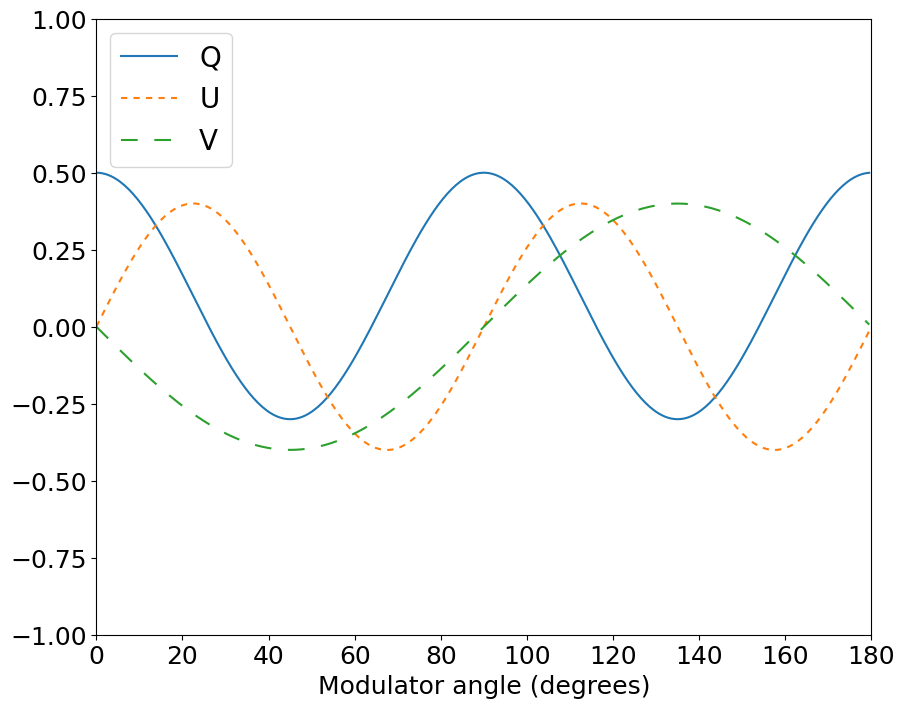

In [11]:
# start with an unpolarized beam:

S_in = np.array([1,0,0,0])


# ----------------------------------------------------------------------------------------
# send the beam through a linear polarizer with horizontal transmission (0 degrees, or +Q)

polarizer = mueller.linear_polarizer(0)
S = np.transpose(polarizer) @ S_in

# ----------------------------------------------------------------------------------------

# modulate the signal by passing it through a rotating waveplate (retarder)

delta = np.degrees(-0.3525*2*np.pi)   # retardation of NIRIS modulator (waveplate)
theta = np.arange(360)/2              # modulator will rotate through 180 degrees
M = mueller.retarder(delta, theta)    # create a Mueller matrix for each angular position of the modulator

S_out = []
for i in range(len(theta)):
    # --------------------------------------------------------------------------------------
    # apply the modulator Mueller matrix to the signal S for every position of the modulator

    S_out_i = np.transpose(M[i]) @ S
    S_out.append(S_out_i)

    # --------------------------------------------------------------------------------------
S_out = np.transpose(np.array(S_out))

# separate the signals
I = S_out[0]
Q = S_out[1]
U = S_out[2]
V = S_out[3]

# plot the results
plt.figure(figsize=(10,8))
plt.plot(theta,Q,label='Q')
plt.plot(theta,U,label='U',linestyle='dashed',dashes=(3,3))
plt.plot(theta,V,label='V',linestyle='dashed',dashes=(8,8))
plt.ylim(-1,1)
plt.xlim(0,180)
plt.xlabel('Modulator angle (degrees)')
plt.legend(fontsize='20',loc='upper left')
plt.show()

### Notice how Stokes Q and U are modulated at twice the frequency of the modulated Stokes V (above)


### The modulated signal reaching the NIRIS detector is:

### $
I'' = \dfrac{1}{2}\Big(I' + \dfrac{Q'}{2}\big((1+\cos{\delta}) + (1-\cos{\delta})\cos{4\theta}\big) + \dfrac{U'}{2}(1-\cos{\delta})\sin{4\theta} - V'\sin{\delta}\sin{2\theta}\Big)
$

where $I',Q',U',V'$ are the Stokes signals after passing through the telescope and NIRIS relay optics. 

Let's simulate this output with the mueller.py 'modulated_output' function:

input: [1.  0.2 0.1 0.3] 

degree of polarization: 0.37 



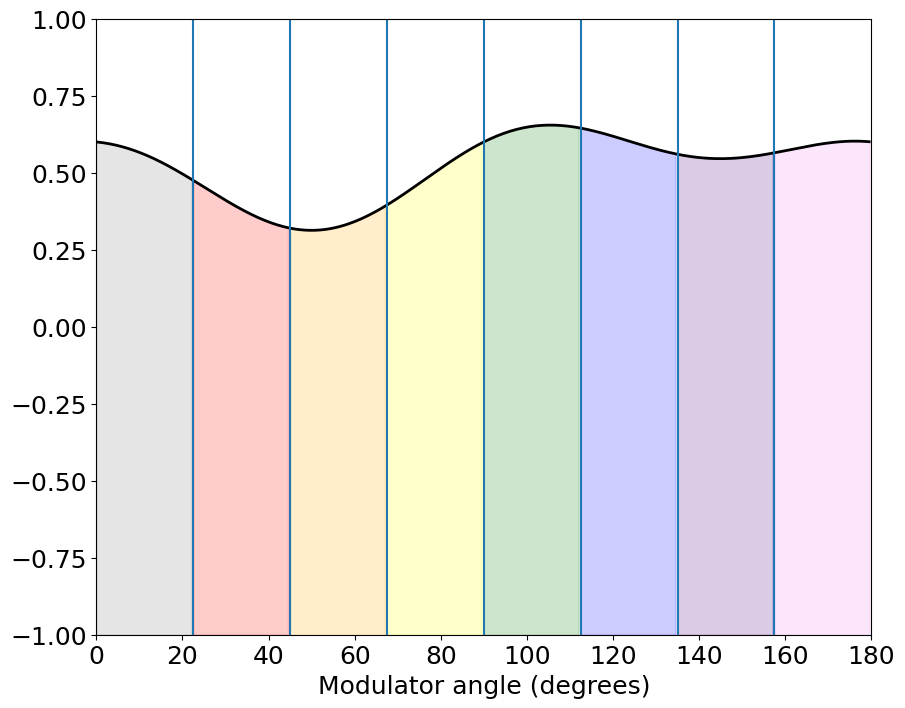

In [14]:
# send a partially polarized beam in:

S = np.array([1,0.2,0.1,0.3])  # change this in your testing
print('input:', S, '\n')

# find the degree of polarization
P_i = mueller.polarization_degree(S)
print('degree of polarization:',round(P_i,2), '\n')

S_detector = mueller.modulated_output(S,delta,theta)

# plot the result with integration bounds for each frame
mueller.plt_signal(S_detector,theta)

### Now let's integrate over each frame

In [26]:
# integrate each frame between the bounds (feel free to try different integration methods here)
frame_1 = np.sum(S_detector[0:45])/2
frame_2 = np.sum(S_detector[45:90])/2 
frame_3 = np.sum(S_detector[90:135])/2 
frame_4 = np.sum(S_detector[135:180])/2 
frame_5 = np.sum(S_detector[180:225])/2 
frame_6 = np.sum(S_detector[225:270])/2 
frame_7 = np.sum(S_detector[270:315])/2 
frame_8 = np.sum(S_detector[315:360])/2 

# linear combinations of the frames recover the I, Q, U, V signals
I =  frame_1 + frame_2 + frame_3 + frame_4 + frame_5 + frame_6 + frame_7 + frame_8
Q =  frame_1 - frame_2 - frame_3 + frame_4 + frame_5 - frame_6 - frame_7 + frame_8
U =  frame_1 + frame_2 - frame_3 - frame_4 + frame_5 + frame_6 - frame_7 - frame_8
V = -frame_1 - frame_2 - frame_3 - frame_4 + frame_5 + frame_6 + frame_7 + frame_8
I = I/2

# normalize
Q = Q/I
U = U/I
V = V/I
I = 1

# the recovered signal:
S_recovered = np.array([I,Q,U,V])
print('original Stokes signal:', [round(ss,2) for ss in S])
print('recovered Stokes signal:', [round(ss,2) for ss in S_recovered], '\n')

P = mueller.polarization_degree(S_recovered)
print('original signal degree of polarization:', round(P_i,2))
print('recovered signal degree of polarization:', round(P,2), '\n')

percent_error = 100*abs(S - S_recovered)/S
print('percent error in I,Q,U,V:', [round(p,2) for p in percent_error], '\n')

original Stokes signal: [1.0, 0.2, 0.1, 0.3]
recovered Stokes signal: [1.0, 0.19, 0.1, 0.29] 

original signal degree of polarization: 0.37
recovered signal degree of polarization: 0.37 

percent error in I,Q,U,V: [0.0, 2.89, 1.38, 2.1] 



## Use the above code to investigate the accuracy of the recovered Stokes vector

### Try using different input vectors:

How does the accuracy change with increasing/decreasing input polarization degree?

Recall that for NIRIS images of active regions (strong magnetic fields), we perform a second calibration of instrumental crosstalk. Why is this necessary?